# 3.0 EDA (Exploratory Data Analysis)
Look at the features in the training data, see how they correlate with each other and the target variable (asking price). This will help inform which features to use or engineer for the model.

In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
# increase cell width
from IPython.display import HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [3]:
DATA_FOLDER = os.path.join('data', 'processed_2')

Read in our training dataset

In [4]:
zoopla_df_train = pd.read_csv(os.path.join(DATA_FOLDER, 'zoopla_train.csv'), dtype=str)

Look at unique values and null values

In [5]:
# unique values
zoopla_df_train.nunique()

listing_id                                 1012
parish                                        5
post_town                                     2
postcode                                     18
latitude                                    883
longitude                                   920
num_bedrooms                                  8
num_bathrooms                                 5
price                                       240
property_type_general                         8
CURRENT_ENERGY_RATING_mode                    5
POTENTIAL_ENERGY_RATING_mode                  4
TOTAL_FLOOR_AREA_median                     286
NUMBER_HABITABLE_ROOMS_mode                  10
CONSTRUCTION_AGE_BAND_mode                   12
Index of Multiple Deprivation Decile         10
Income Decile                                10
Employment Decile                            10
Education and Skills Decile                  10
Health and Disability Decile                 10
Crime Decile                            

In [6]:
# value counts for each variable
for col in zoopla_df_train.columns:
    display(zoopla_df_train[col].value_counts(dropna=False))

63843030    1
62995166    1
62362640    1
64223326    1
64333814    1
           ..
63295859    1
62724341    1
64177753    1
62869581    1
61904785    1
Name: listing_id, Length: 1012, dtype: int64

Nuneaton and Bedworth, unparished area    645
Hinckley and Bosworth, unparished area    320
Stoke Golding                              17
Other                                      15
Burbage                                    15
Name: parish, dtype: int64

Nuneaton    678
Hinckley    334
Name: post_town, dtype: int64

LE10 0    201
CV11 6    141
LE10 1    114
CV10 9    112
CV10 0     98
CV11 4     84
CV10 7     67
CV10 8     67
CV11 5     54
CV13 6     26
CV11 7     20
LE10 3     11
LE10 2      9
CV13 0      3
CV12 9      2
LE9 7       1
LE9 8       1
LE9 9       1
Name: postcode, dtype: int64

52.537514    20
52.52017     16
52.543385    13
52.527702     8
52.5709       5
             ..
52.520607     1
52.521805     1
52.507175     1
52.521534     1
52.517788     1
Name: latitude, Length: 883, dtype: int64

-1.434415     20
-1.4552873    15
-1.447905     13
-1.503643      8
-1.408061      5
              ..
-1.506124      1
-1.492897      1
-1.509242      1
-1.48185       1
-1.486282      1
Name: longitude, Length: 920, dtype: int64

3    459
2    260
4    217
5     37
1     24
0      9
7      3
6      3
Name: num_bedrooms, dtype: int64

1    593
2    285
0     71
3     56
4      7
Name: num_bathrooms, dtype: int64

250000.0    51
260000.0    34
325000.0    26
210000.0    26
220000.0    26
            ..
455000.0     1
148000.0     1
264000.0     1
800000.0     1
117500.0     1
Name: price, Length: 240, dtype: int64

Detached house         320
Semi-detached house    278
Terraced house         174
Flat                    85
Bungalow                66
End terrace house       51
Other/Unknown           30
Maisonette               8
Name: property_type_general, dtype: int64

4.0    425
3.0    192
NaN    158
2.0    149
5.0     84
6.0      4
Name: CURRENT_ENERGY_RATING_mode, dtype: int64

2.0    559
3.0    181
NaN    158
1.0    106
4.0      8
Name: POTENTIAL_ENERGY_RATING_mode, dtype: int64

NaN                  158
77.0                  25
84.0                  22
96.0                  19
70.0                  16
                    ... 
71.5                   1
115.5                  1
64.35                  1
92.86500000000001      1
62.725                 1
Name: TOTAL_FLOOR_AREA_median, Length: 287, dtype: int64

NaN     284
5.0     259
4.0     178
3.0     120
6.0      89
7.0      45
2.0      17
8.0      12
9.0       6
10.0      1
1.0       1
Name: NUMBER_HABITABLE_ROOMS_mode, dtype: int64

NaN     243
2.0     123
3.0     102
5.0      94
4.0      80
10.0     65
7.0      59
9.0      53
12.0     51
6.0      37
1.0      37
8.0      37
11.0     31
Name: CONSTRUCTION_AGE_BAND_mode, dtype: int64

8      210
4      121
6      113
5      108
3       99
9       94
10      81
1       67
2       48
7       38
NaN     33
Name: Index of Multiple Deprivation Decile, dtype: int64

9      189
7      156
5      140
4      110
3       92
10      83
6       63
2       57
1       48
8       41
NaN     33
Name: Income Decile, dtype: int64

6      185
8      169
9      129
4      127
3      106
2       75
5       64
7       59
1       51
NaN     33
10      14
Name: Employment Decile, dtype: int64

5      173
3      163
4      154
8      127
2       99
1       98
9       68
7       54
NaN     33
6       32
10      11
Name: Education and Skills Decile, dtype: int64

4      154
5      151
6      139
7      132
3      102
9       99
2       83
8       70
NaN     33
1       25
10      24
Name: Health and Disability Decile, dtype: int64

4      198
7      141
6      132
3      109
8       81
1       79
5       73
9       64
2       61
10      41
NaN     33
Name: Crime Decile, dtype: int64

8      172
9      166
4      163
7      133
10     107
3      103
5       65
6       41
NaN     33
1       28
2        1
Name: Barriers to Housing and Services Decile, dtype: int64

6      194
9      162
4      144
10     127
2       84
8       81
5       68
7       58
3       48
NaN     33
1       13
Name: Living Environment Decile, dtype: int64

5      156
8      156
9      136
4      116
6      105
7       86
1       67
2       61
3       53
10      43
NaN     33
Name: IDACI Decile, dtype: int64

5      164
9      153
8      134
6      111
4      106
10      90
7       87
2       70
NaN     33
1       32
3       32
Name: IDAOPI Decile, dtype: int64

None      955
NaN        43
Medium     12
Low         2
Name: PROB_4BAND, dtype: int64

0     442
1     181
2     121
3      78
4      50
5      50
6      31
7      25
8      13
9       8
10      4
14      3
12      3
11      1
21      1
19      1
Name: diff_published_date, dtype: int64

2023    878
2022    134
Name: last_published_year, dtype: int64

4     434
3     184
2     131
1     129
11     40
12     39
10     37
9      11
8       7
Name: last_published_month, dtype: int64

2023    591
2022    416
2021      5
Name: first_published_year, dtype: int64

3     171
1     163
4     154
2     119
10    103
11     88
9      68
8      50
12     46
7      25
6      16
5       9
Name: first_published_month, dtype: int64

Later we will set null values in numeric values to 0 (with a new column that is a flag (bool) if the value is null). We will also apply caps and aggregate some values to remove rare values or values that are in the test set but not the training set.

listing_id                                  0.000000
parish                                      0.000000
post_town                                   0.000000
postcode                                    0.000000
latitude                                    0.000000
longitude                                   0.000000
num_bedrooms                                0.000000
num_bathrooms                               0.000000
price                                       0.000000
property_type_general                       0.000000
CURRENT_ENERGY_RATING_mode                 15.612648
POTENTIAL_ENERGY_RATING_mode               15.612648
TOTAL_FLOOR_AREA_median                    15.612648
NUMBER_HABITABLE_ROOMS_mode                28.063241
CONSTRUCTION_AGE_BAND_mode                 24.011858
Index of Multiple Deprivation Decile        3.260870
Income Decile                               3.260870
Employment Decile                           3.260870
Education and Skills Decile                 3.

<Axes: >

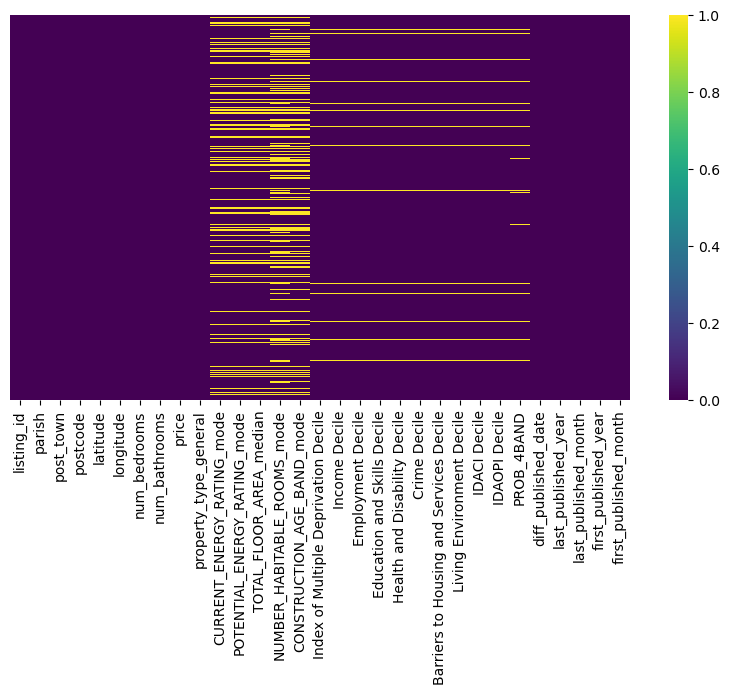

In [7]:
# null values (as a percentage of all records and as a heatmap)
display(100*zoopla_df_train.isnull().sum()/len(zoopla_df_train))
plt.figure(figsize=(10,5))
sns.heatmap(zoopla_df_train.isnull(), cmap='viridis', yticklabels=False)

### Separate out into numeric and categoric columns

In [8]:
numeric_cols = ['latitude', 'longitude', 'num_bedrooms', 'num_bathrooms', 'CURRENT_ENERGY_RATING_mode',
       'POTENTIAL_ENERGY_RATING_mode', 'TOTAL_FLOOR_AREA_median', 'CONSTRUCTION_AGE_BAND_mode',
       'Index of Multiple Deprivation Decile', 'Income Decile',
       'Employment Decile', 'Education and Skills Decile',
       'Health and Disability Decile', 'Crime Decile',
       'Barriers to Housing and Services Decile', 'Living Environment Decile',
       'IDACI Decile', 'IDAOPI Decile', 'diff_published_date',
       'last_published_year', 'last_published_month', 'first_published_year',
       'first_published_month', 'price']
zoopla_df_train[numeric_cols] = zoopla_df_train[numeric_cols].astype(float)

In [9]:
categoric_cols = ['post_town', 'parish', 'postcode', 'PROB_4BAND', 'property_type_general']

### Target variable plot (price)

<Axes: xlabel='price', ylabel='Count'>

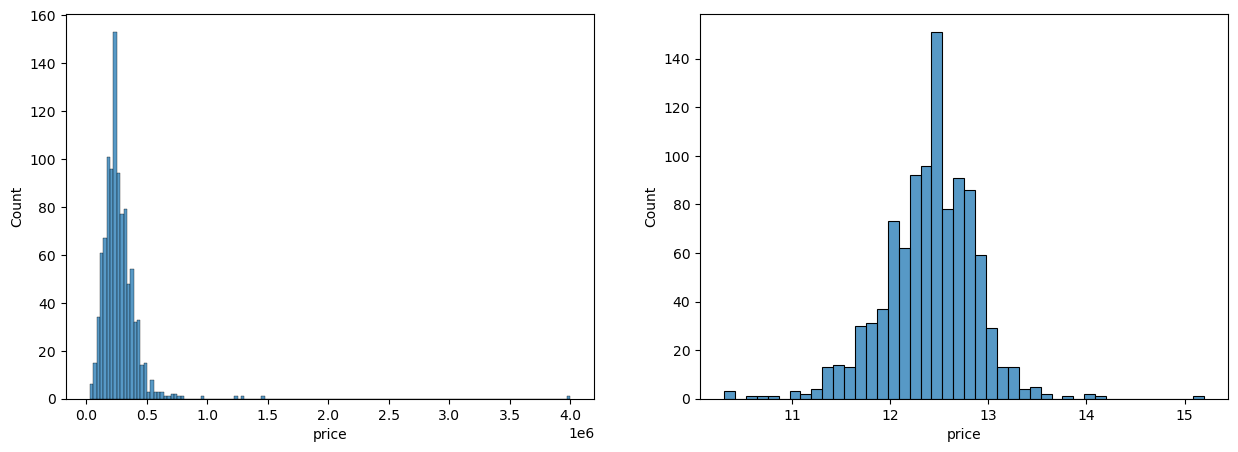

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(zoopla_df_train['price'], ax=ax[0])
sns.histplot(np.log(zoopla_df_train['price']), ax=ax[1])

If a log plot, much more normally distributed. Likely better for fitting. Later, we will drop house prices greater than 1 million pounds to avoid outliers

### Correlation Plots

<Axes: >

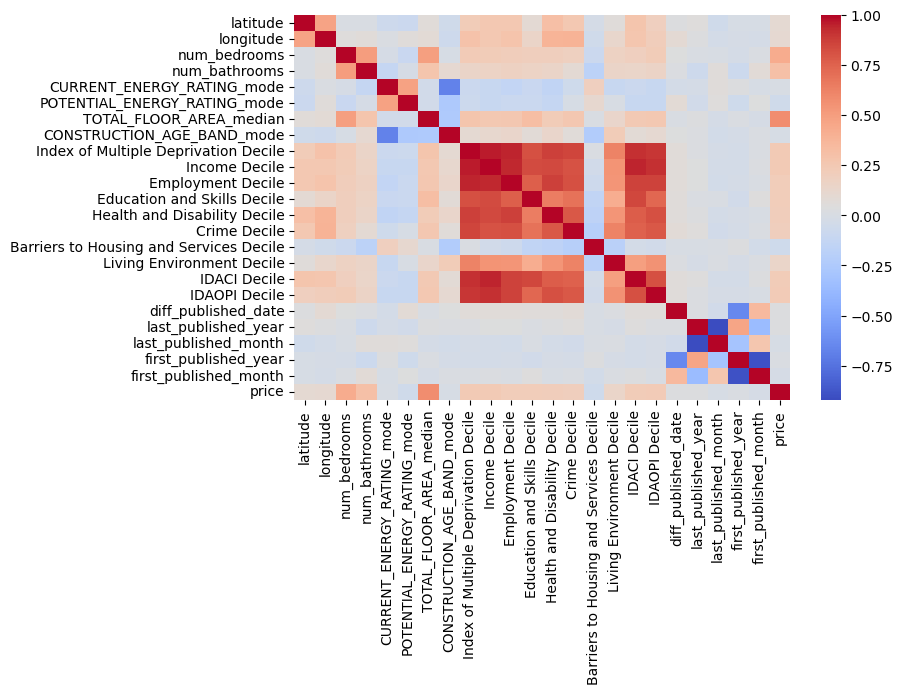

In [11]:
# correlations of all numeric columns
plt.figure(figsize=(8,5))
sns.heatmap(zoopla_df_train[numeric_cols].corr(), cmap='coolwarm')

Can see the income, employment, education, crime etc variables are highly positively correlated. Construction age band and EPC are negatively correlated. Let's look in more detail at these.

#### Look at individual plots in more detail

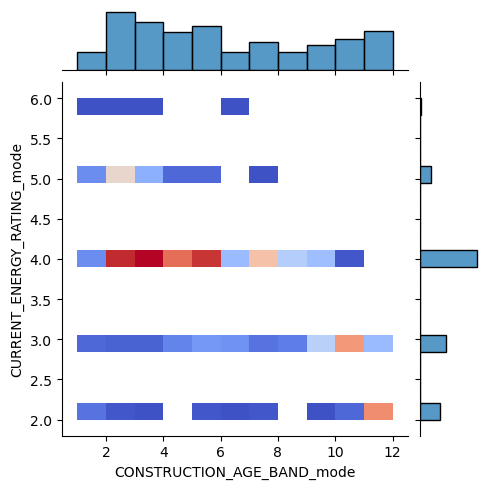

In [12]:
# construction age vs EPC. Higher EPC number means worse rating. Higher construction age band means more recent.
sns.jointplot(x=zoopla_df_train['CONSTRUCTION_AGE_BAND_mode'], y=zoopla_df_train['CURRENT_ENERGY_RATING_mode'], kind='hist', cmap='coolwarm', height=5)

/home/robertv/anaconda3/envs/datascience2/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 17.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/robertv/anaconda3/envs/datascience2/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 24.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/robertv/anaconda3/envs/datascience2/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


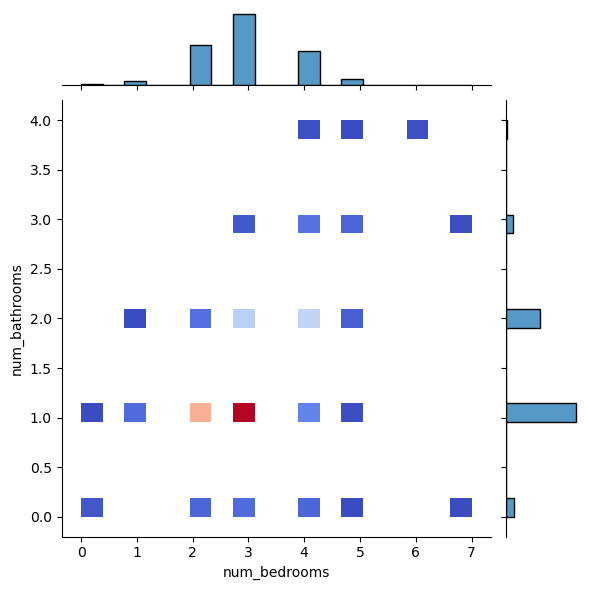

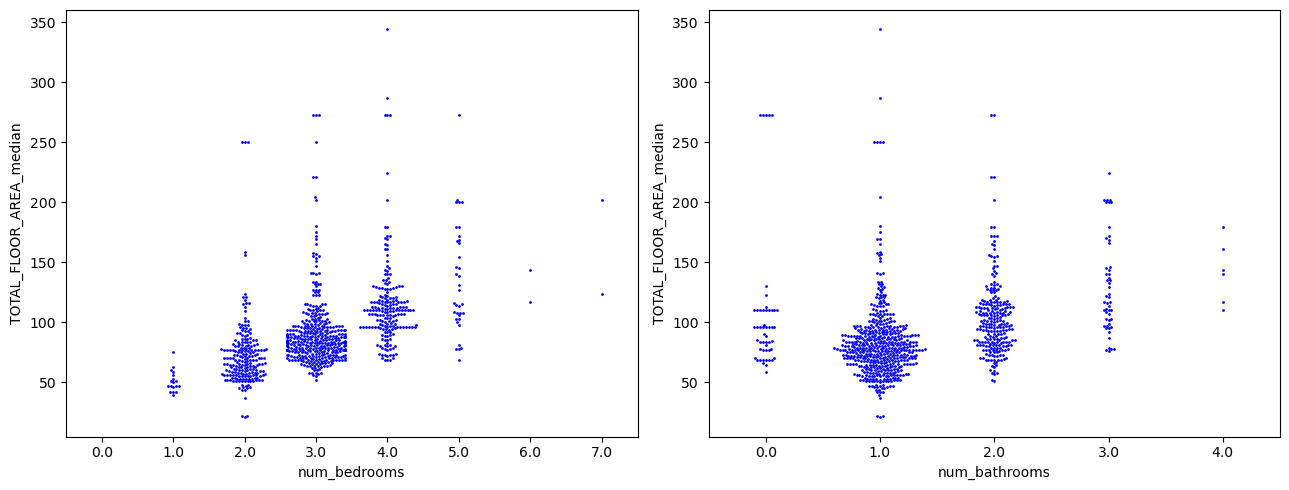

In [13]:
# number bedrooms, number bathrooms and total floor area
sns.jointplot(x=zoopla_df_train['num_bedrooms'], y=zoopla_df_train['num_bathrooms'], kind='hist', cmap='coolwarm')

fig, ax = plt.subplots(1, 2, figsize=(13, 5))
sns.swarmplot(x=zoopla_df_train['num_bedrooms'], y=zoopla_df_train['TOTAL_FLOOR_AREA_median'], s=2, color='b', ax=ax[0])
sns.swarmplot(x=zoopla_df_train['num_bathrooms'], y=zoopla_df_train['TOTAL_FLOOR_AREA_median'], s=2, color='b', ax=ax[1])
plt.tight_layout()

<Axes: xlabel='num_bathrooms', ylabel='count'>

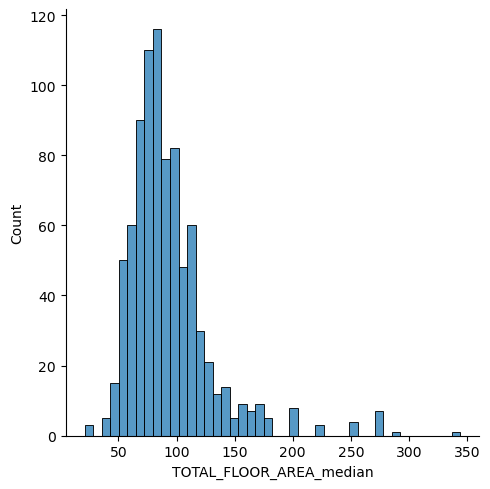

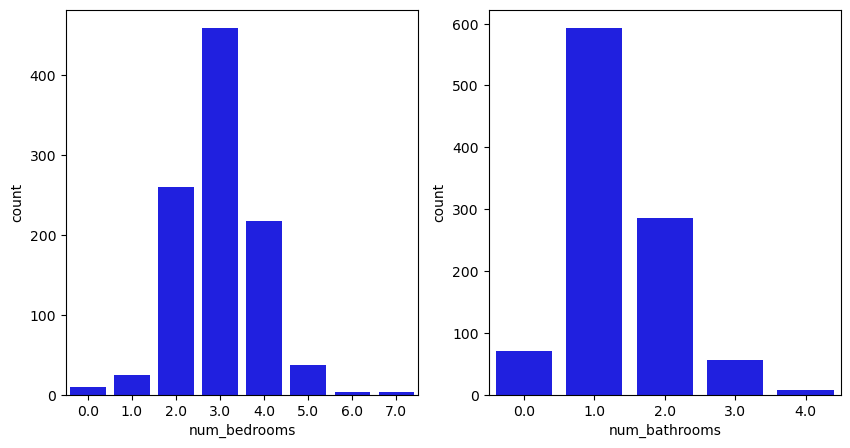

In [14]:
# 1D plots of total floor area, num bedrooms and bathrooms

sns.displot(zoopla_df_train['TOTAL_FLOOR_AREA_median'])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x=zoopla_df_train['num_bedrooms'], ax=ax[0], color='b')
sns.countplot(x=zoopla_df_train['num_bathrooms'], ax=ax[1], color='b')

### Correlation plots on target variable, price

<Axes: >

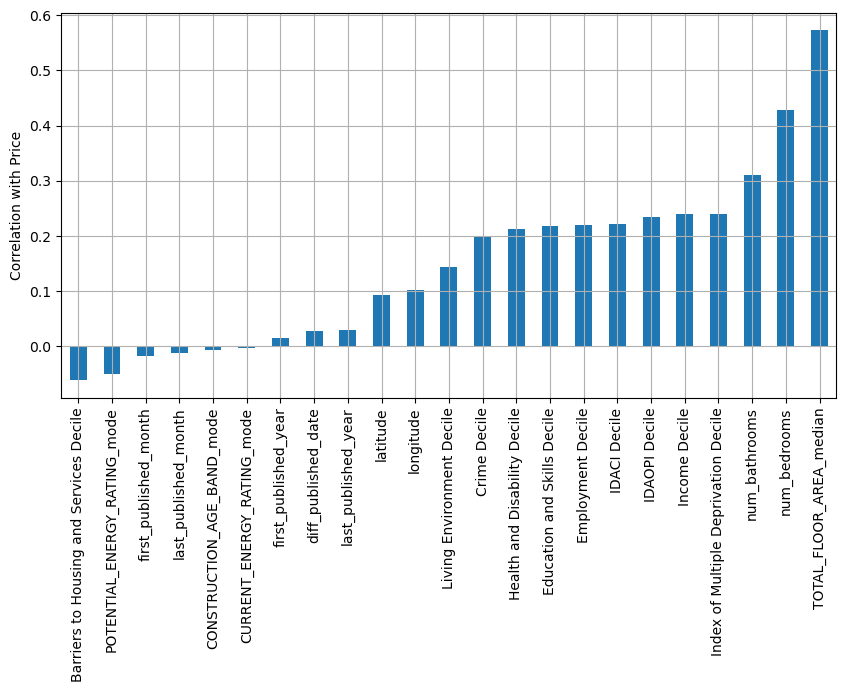

In [15]:
plt.figure(figsize=(10, 5))
display(zoopla_df_train[numeric_cols].astype(float).corr()[:-1]['price'].sort_values().plot(kind='bar'))
plt.ylabel('Correlation with Price')
plt.grid()

#### Look at some of these in more detail

In [16]:
def plot_graph(x_col, y_col, kind, y_lim, var_order=None):
    
    """
    Create 2D plots of x vs y, where the kind of plot can be specificed, maximum y limit and order
    from left to right of the x variable values
    """
    
    fig = plt.figure(figsize=(8, 6))
    
    if kind == 'scatter':
        sns.scatterplot(x=x_col, y=y_col)
    elif kind == 'violin':
        sns.violinplot(x=x_col, y=y_col, order=var_order)
    elif kind == 'box':
        sns.boxplot(x=x_col, y=y_col, order=var_order)
    elif kind == 'hist':
        g = sns.jointplot(x=x_col, y=y_col, kind='hist', cmap='coolwarm')
        g.fig.set_figwidth(8)
        g.fig.set_figheight(6)
    elif kind == 'hex':
        g = sns.jointplot(x=x_col, y=y_col, kind='hex')
        g.fig.set_figwidth(8)
        g.fig.set_figheight(4)
    
    plt.ylim((0, y_lim))
    plt.xlabel(x_col.name.title(), fontsize=15)
    plt.xticks(fontsize=14, rotation=90)
    plt.ylabel('Price', fontsize=15)
    plt.xticks(fontsize=14)
    plt.tight_layout()
    

/tmp/ipykernel_6357/2712546238.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(8, 6))


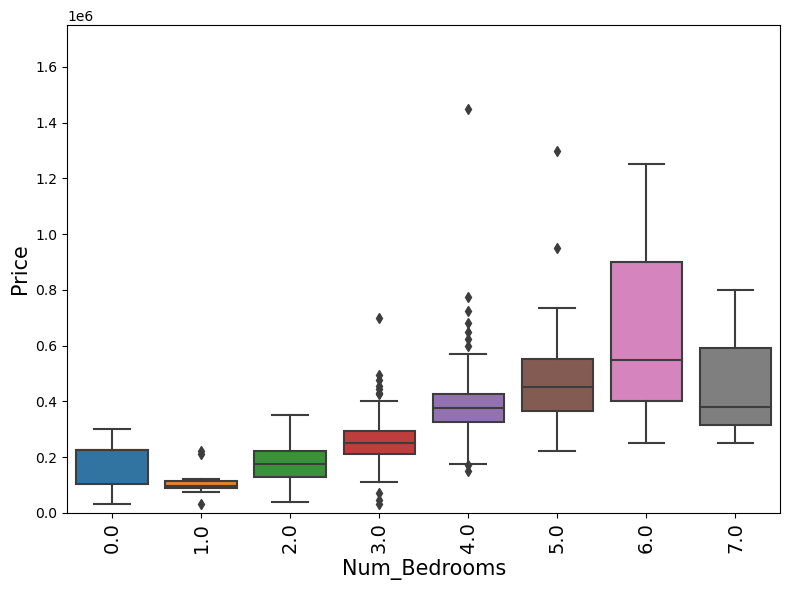

<Figure size 800x600 with 0 Axes>

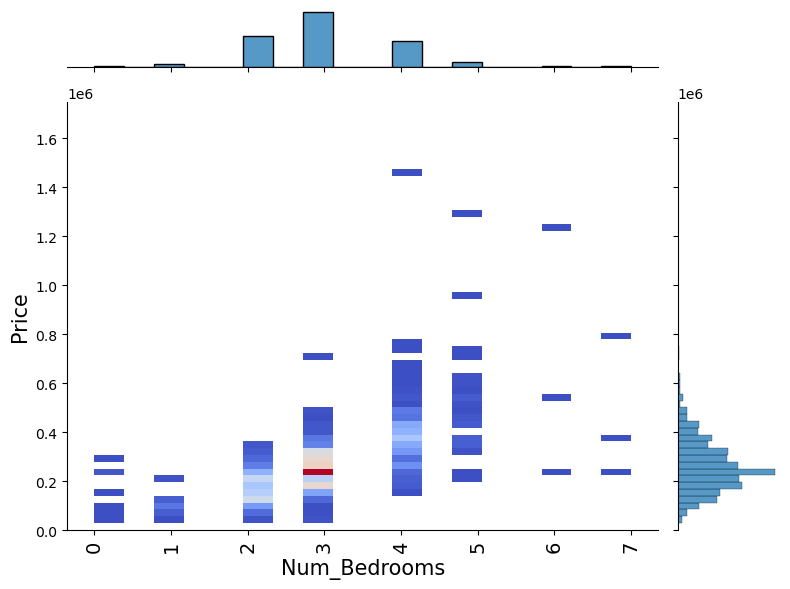

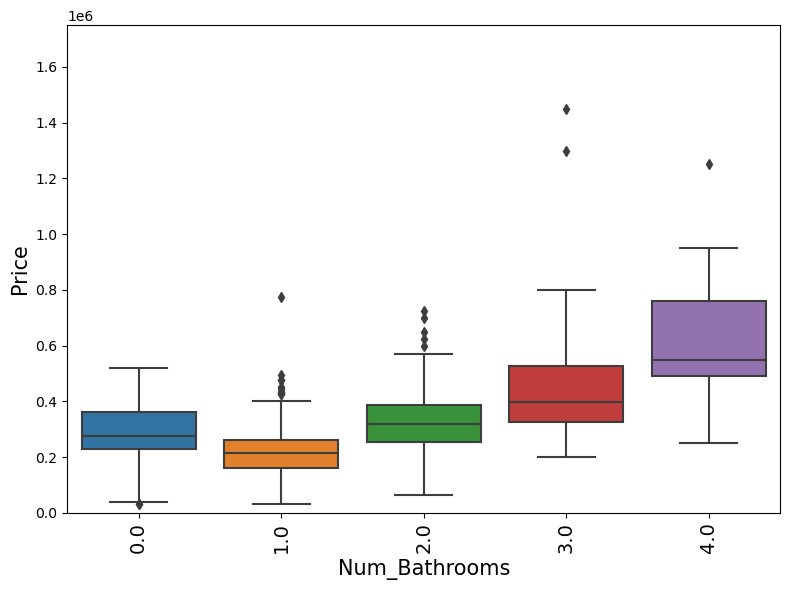

<Figure size 800x600 with 0 Axes>

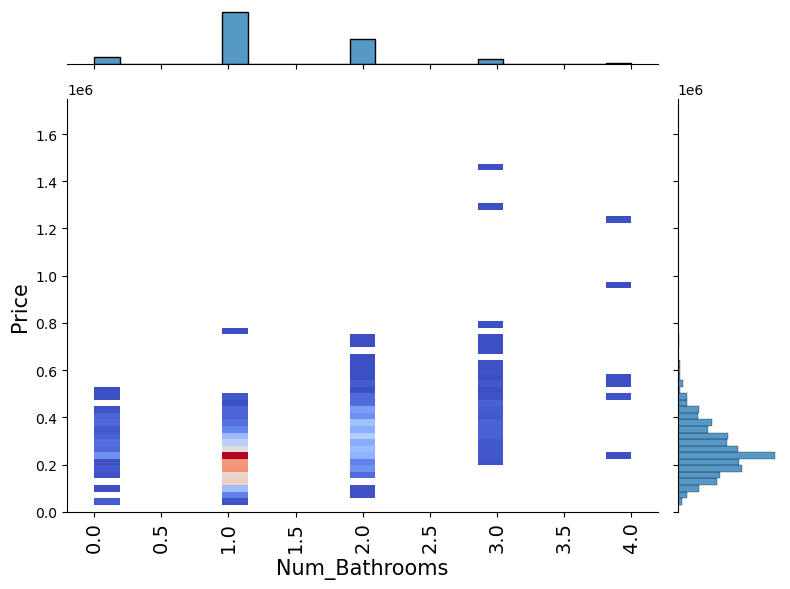

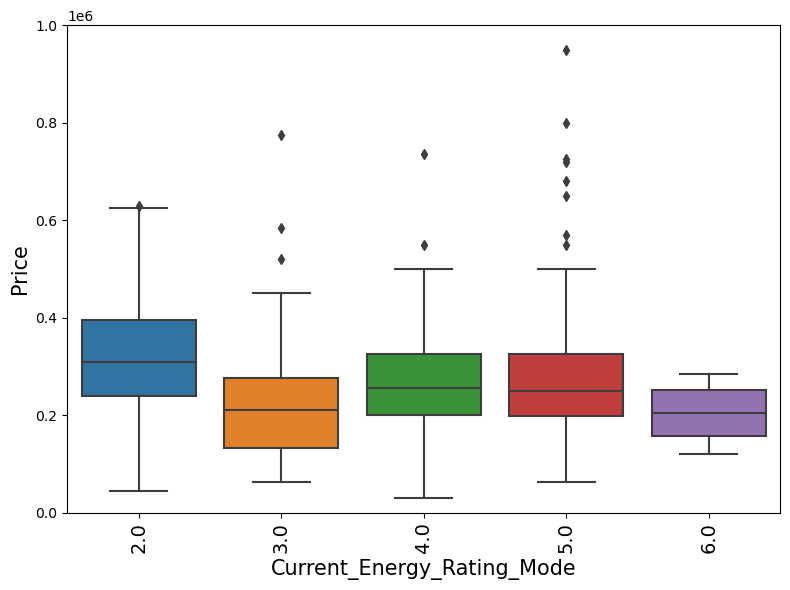

<Figure size 800x600 with 0 Axes>

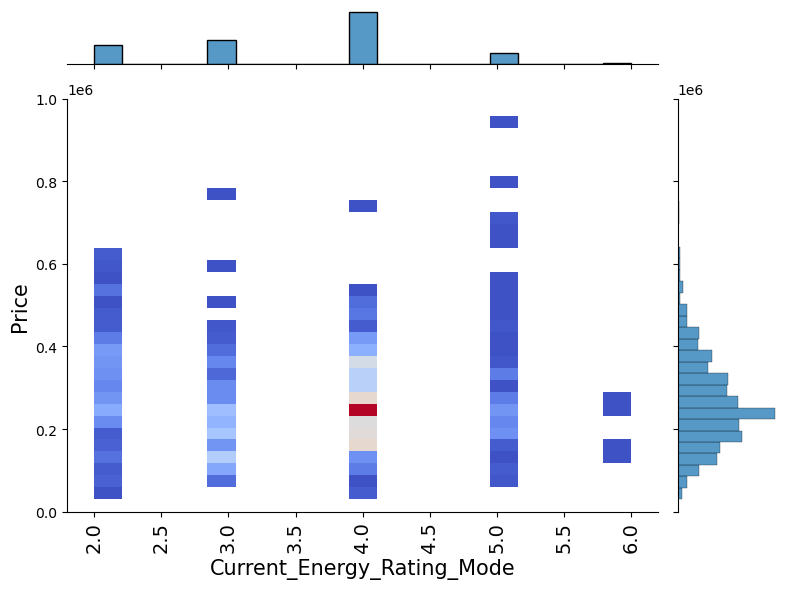

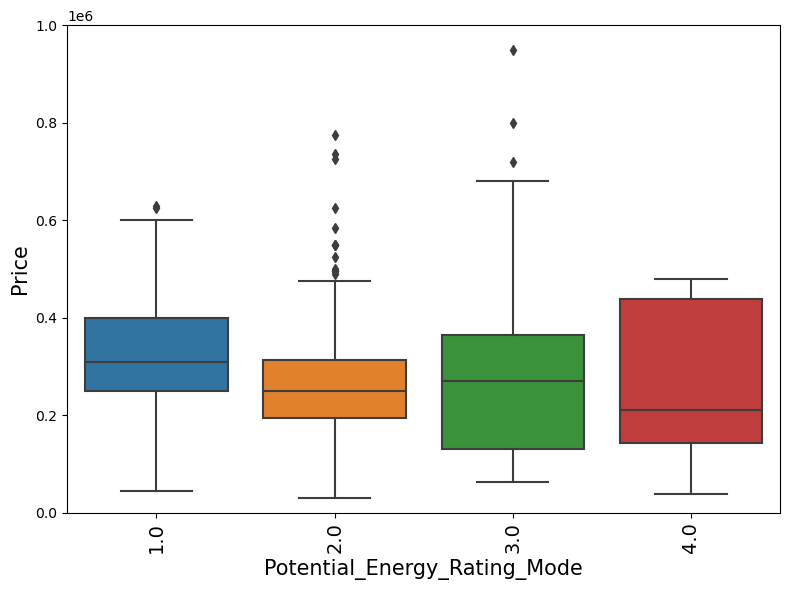

<Figure size 800x600 with 0 Axes>

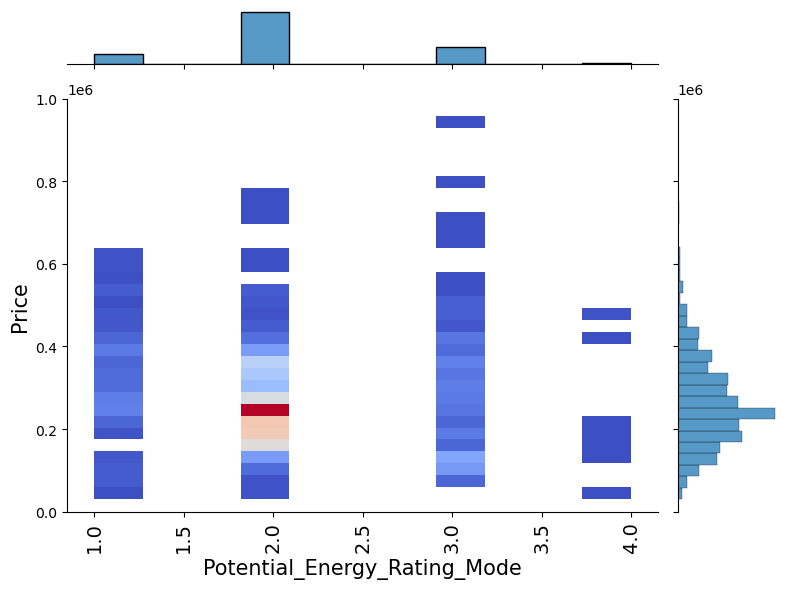

<Figure size 800x600 with 0 Axes>

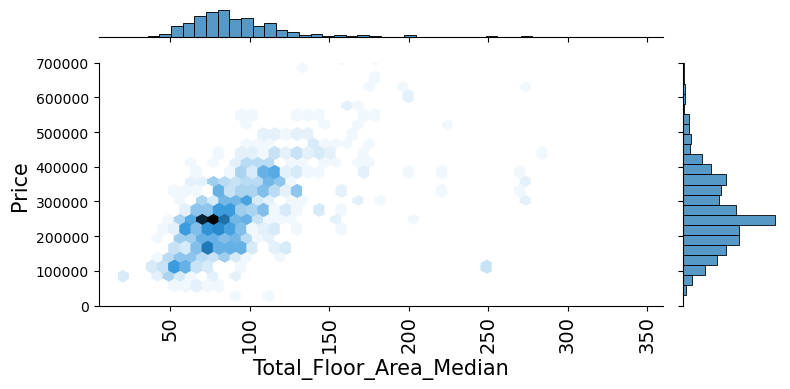

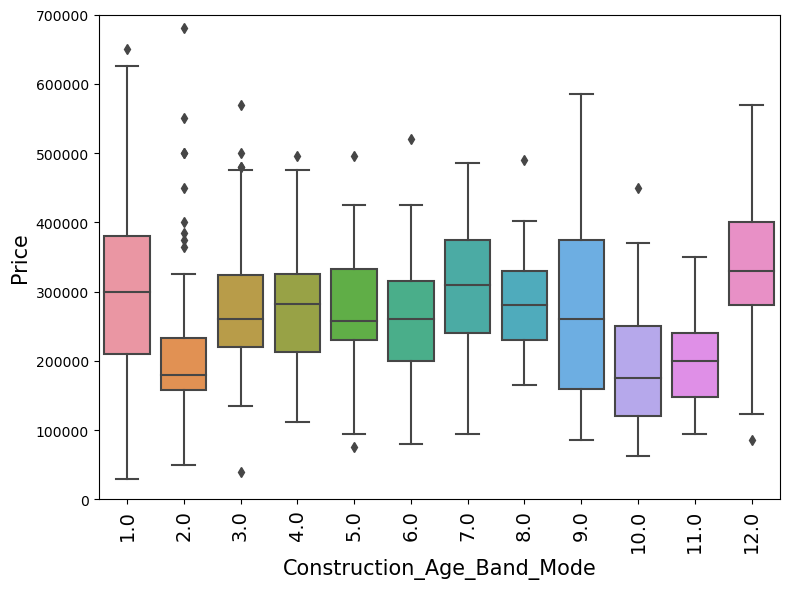

<Figure size 800x600 with 0 Axes>

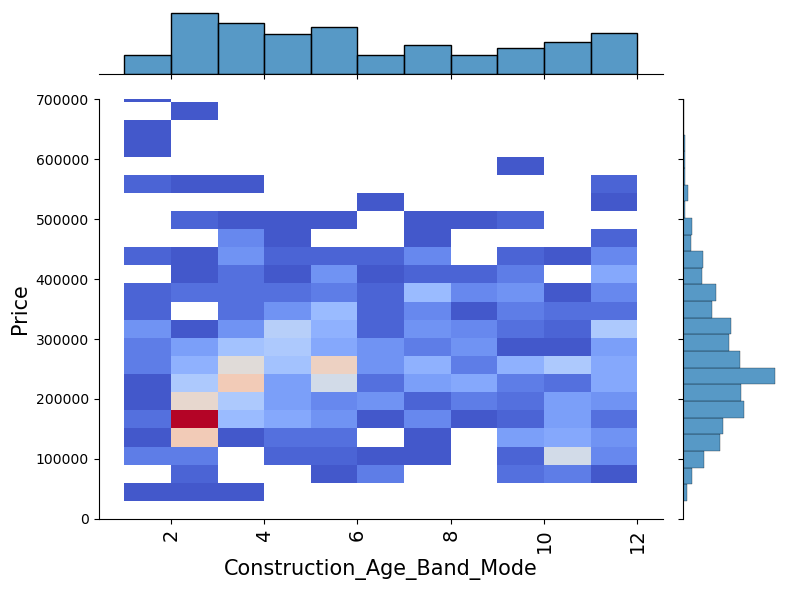

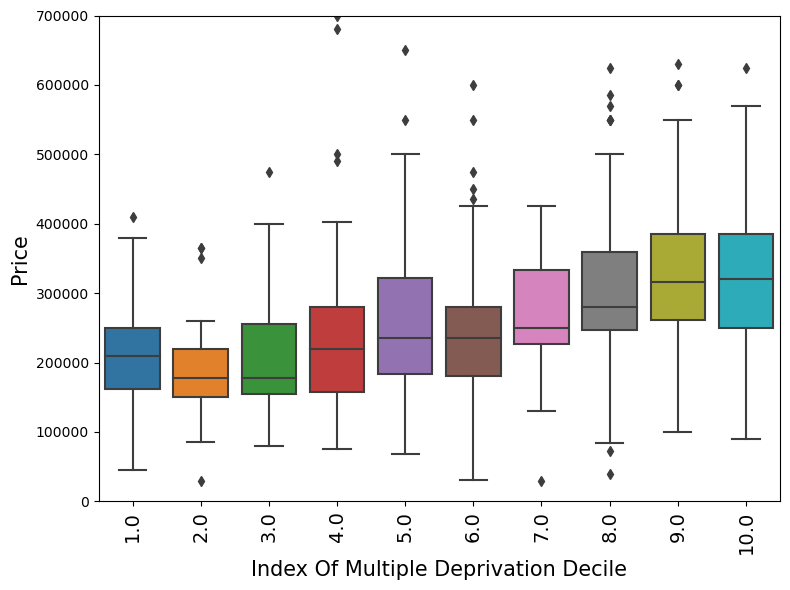

<Figure size 800x600 with 0 Axes>

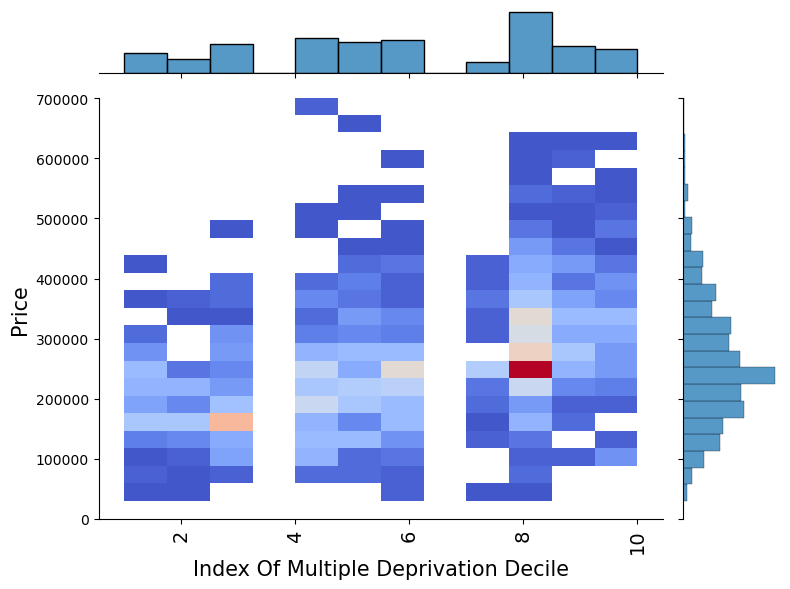

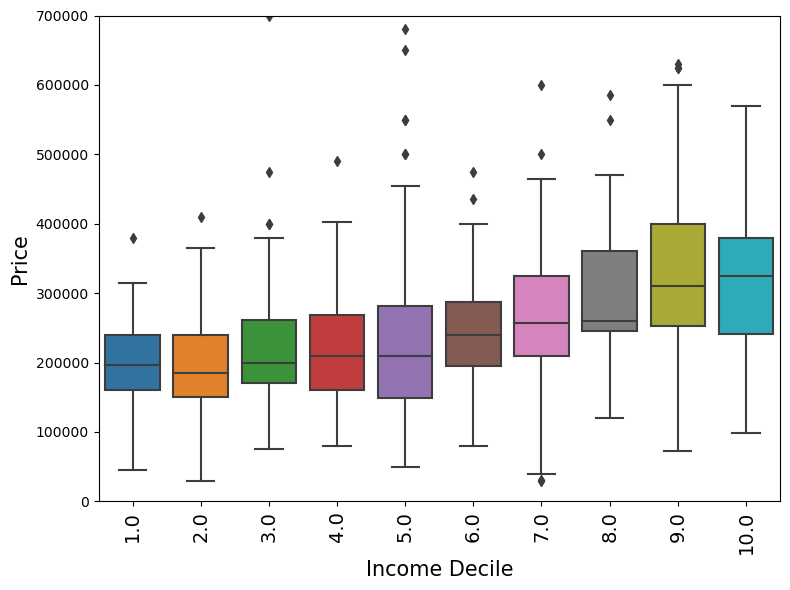

<Figure size 800x600 with 0 Axes>

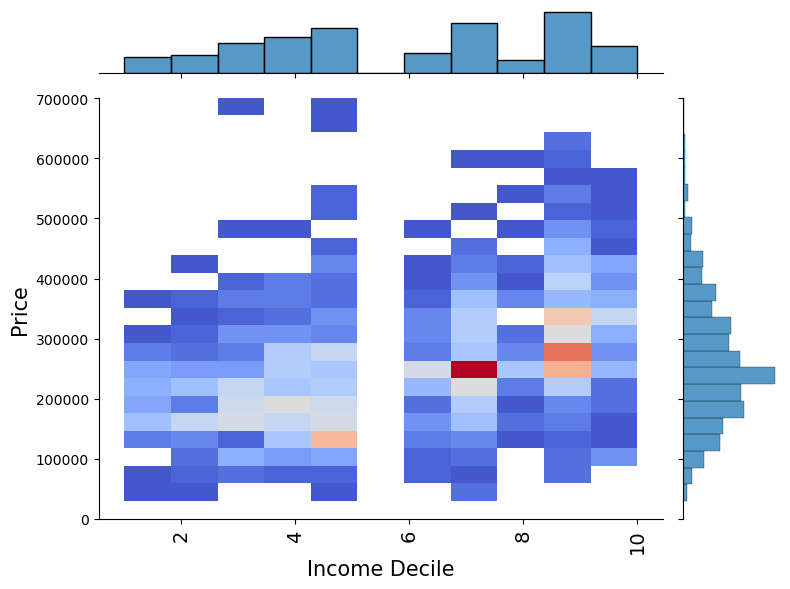

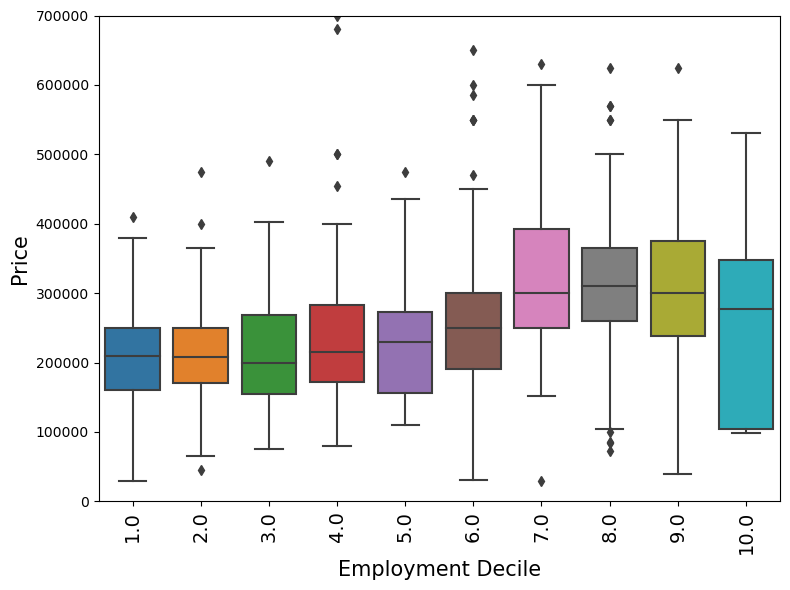

<Figure size 800x600 with 0 Axes>

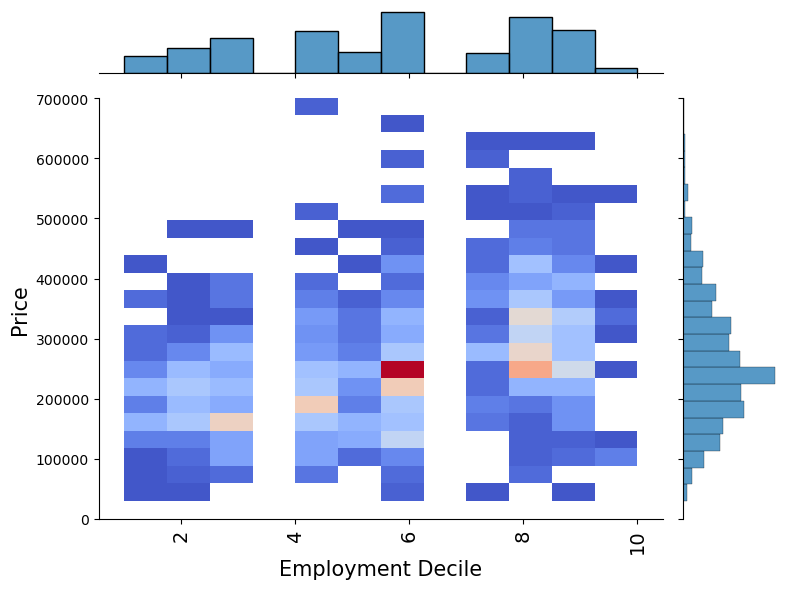

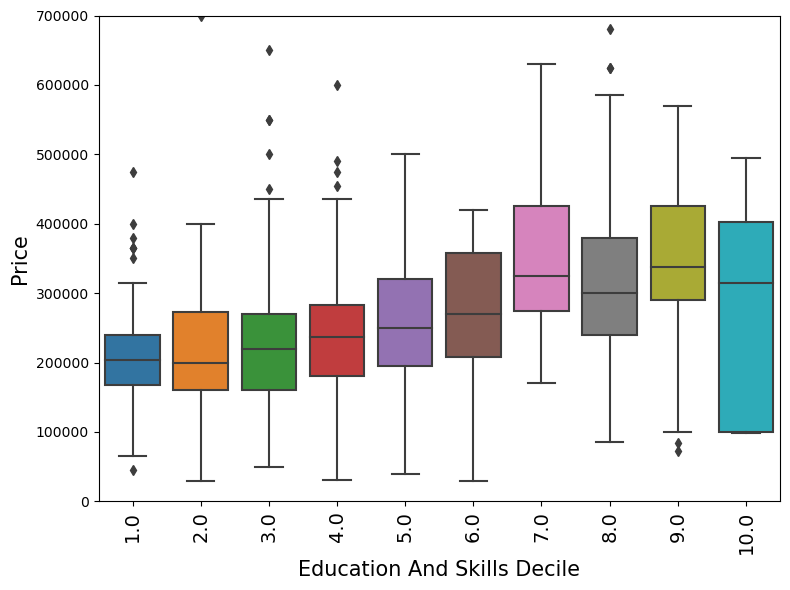

<Figure size 800x600 with 0 Axes>

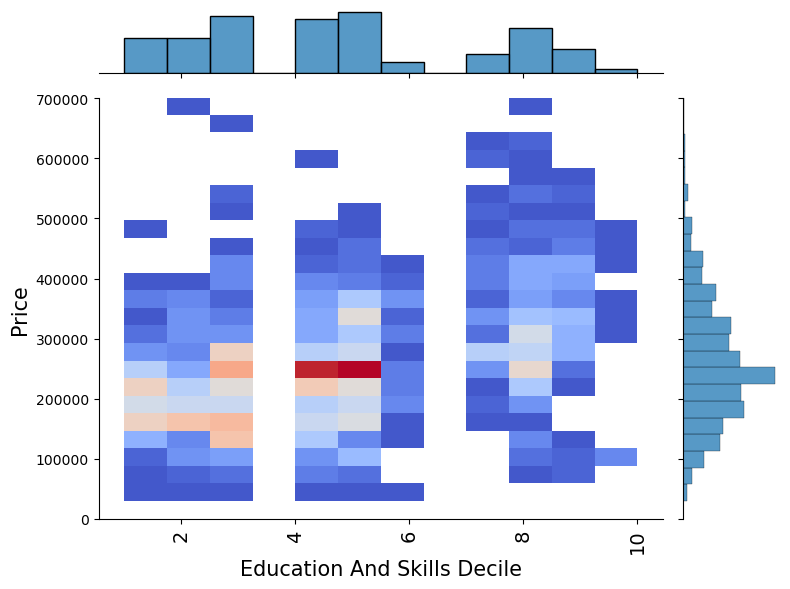

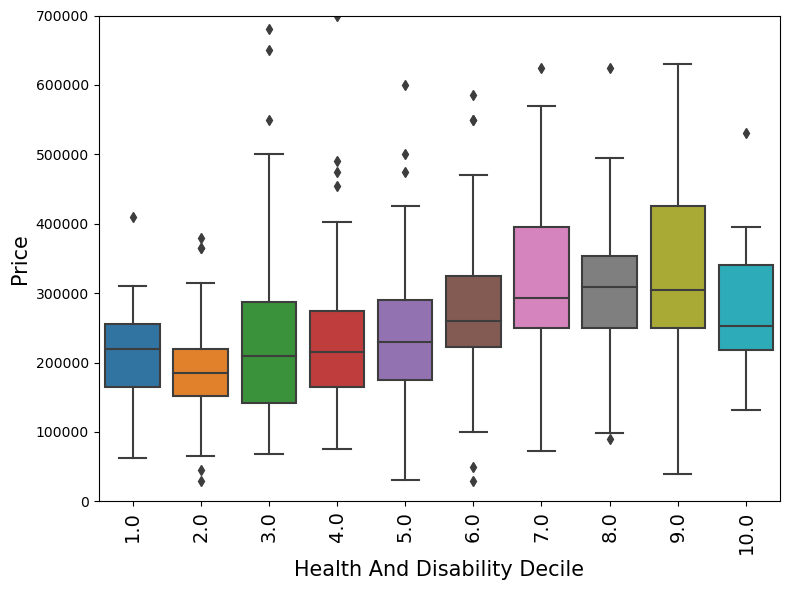

<Figure size 800x600 with 0 Axes>

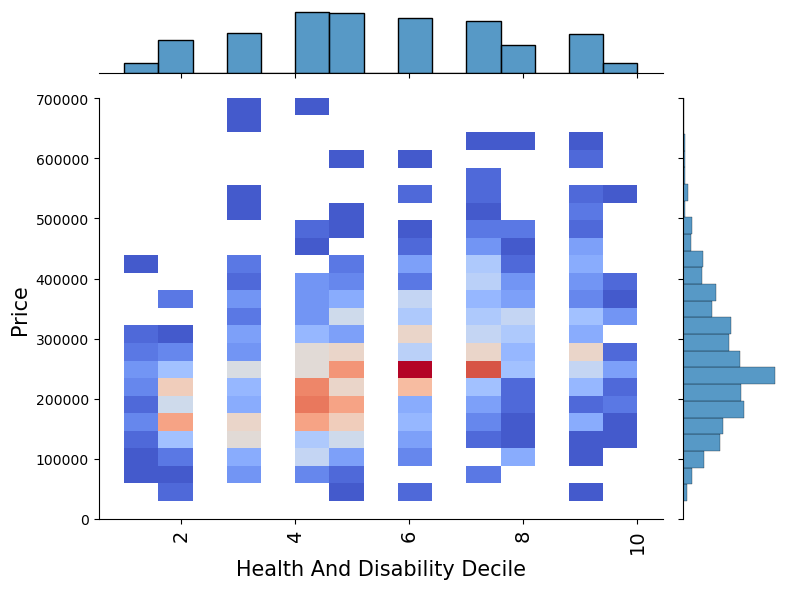

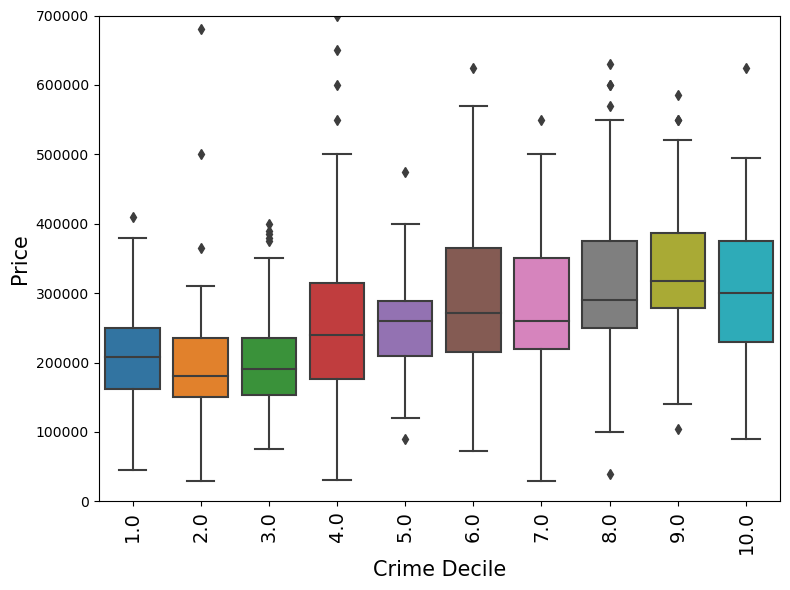

<Figure size 800x600 with 0 Axes>

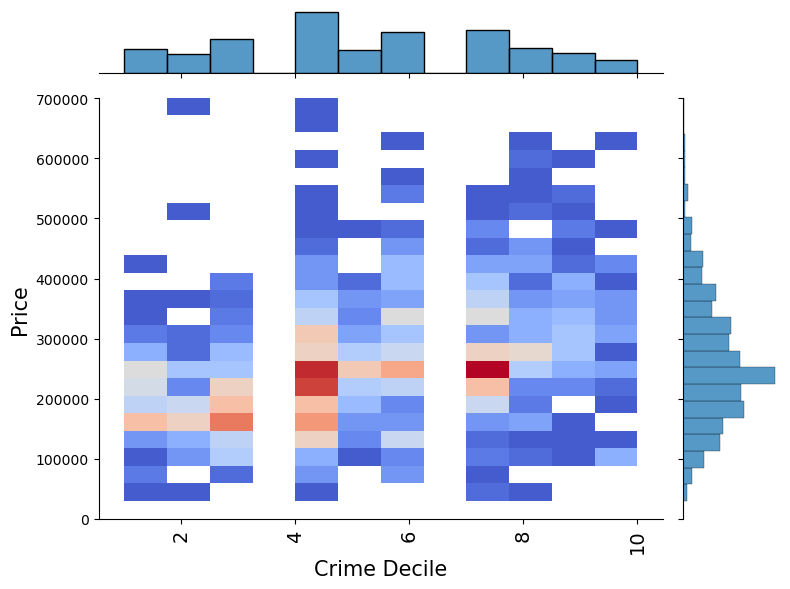

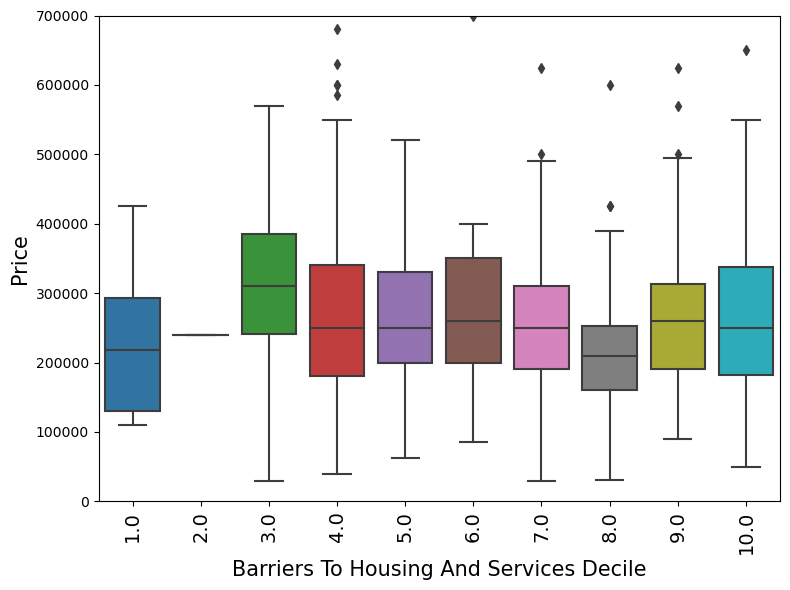

<Figure size 800x600 with 0 Axes>

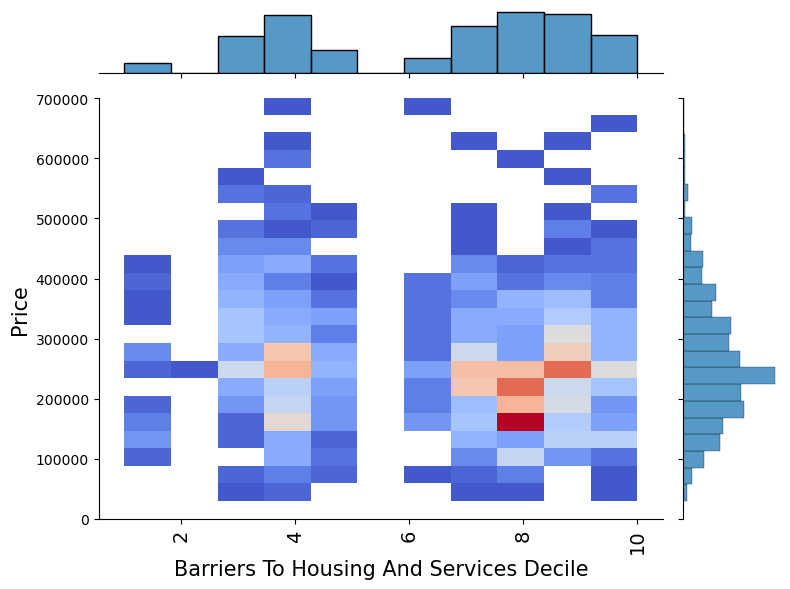

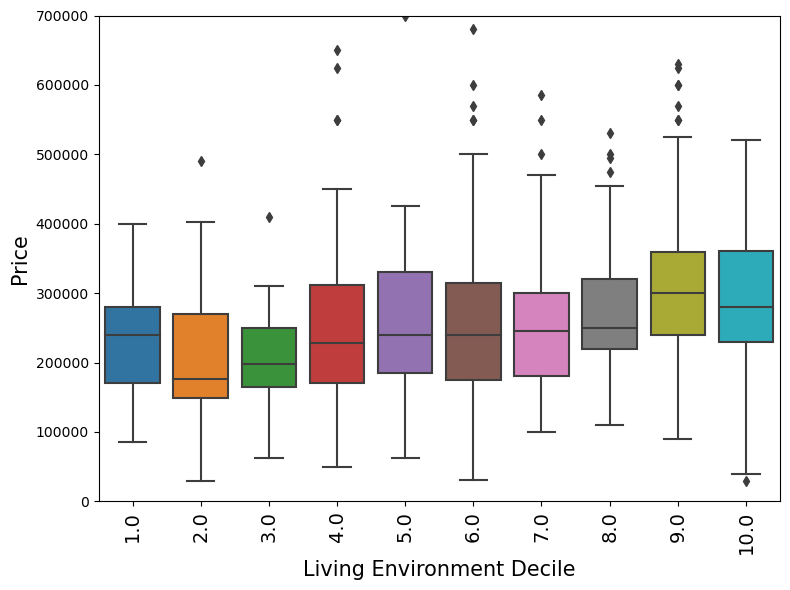

<Figure size 800x600 with 0 Axes>

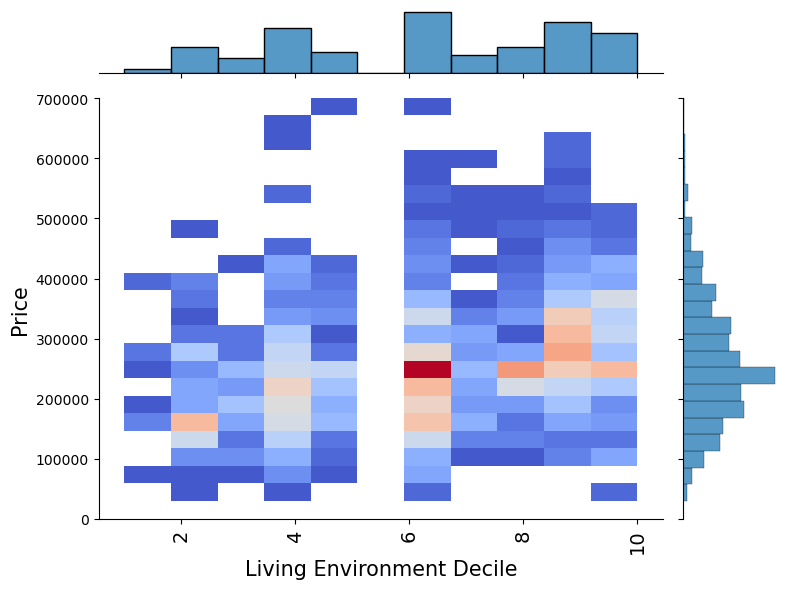

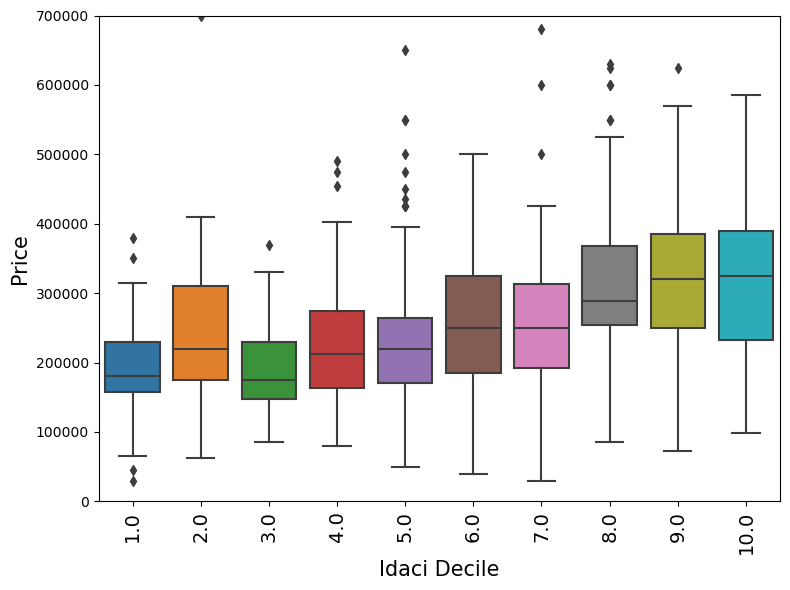

<Figure size 800x600 with 0 Axes>

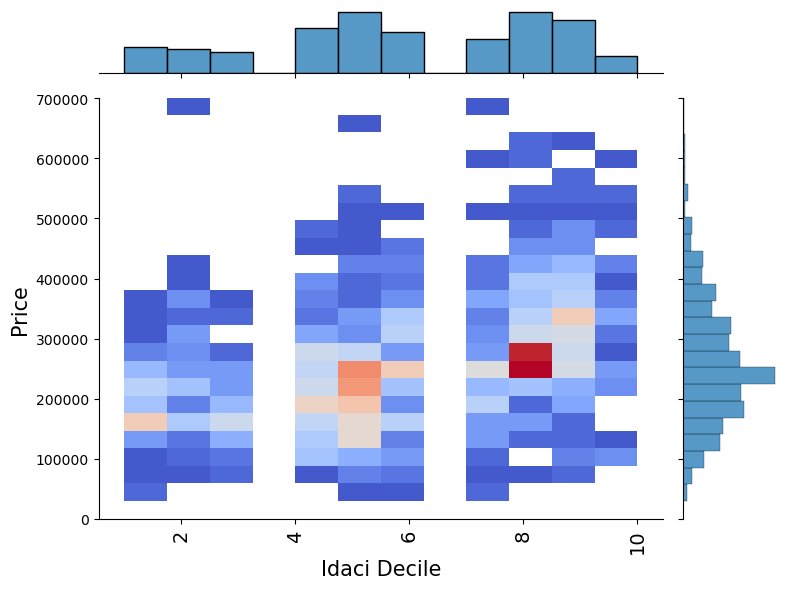

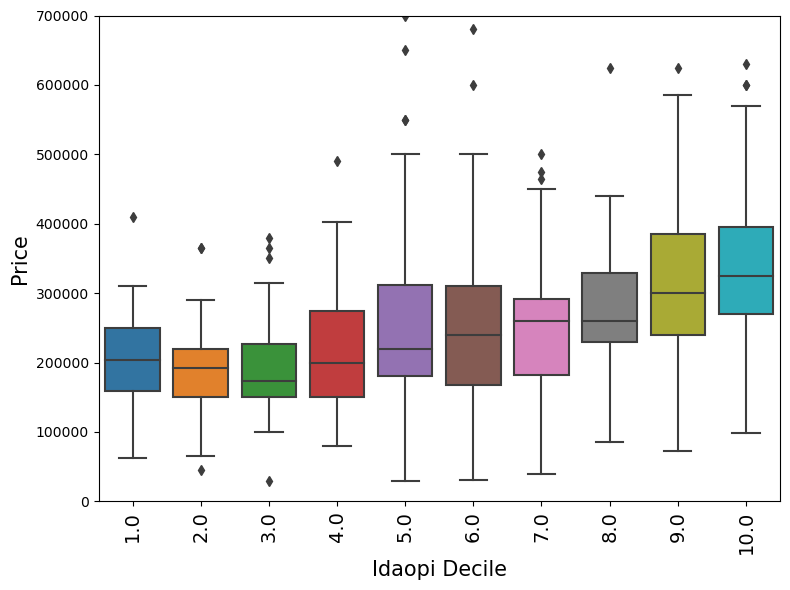

<Figure size 800x600 with 0 Axes>

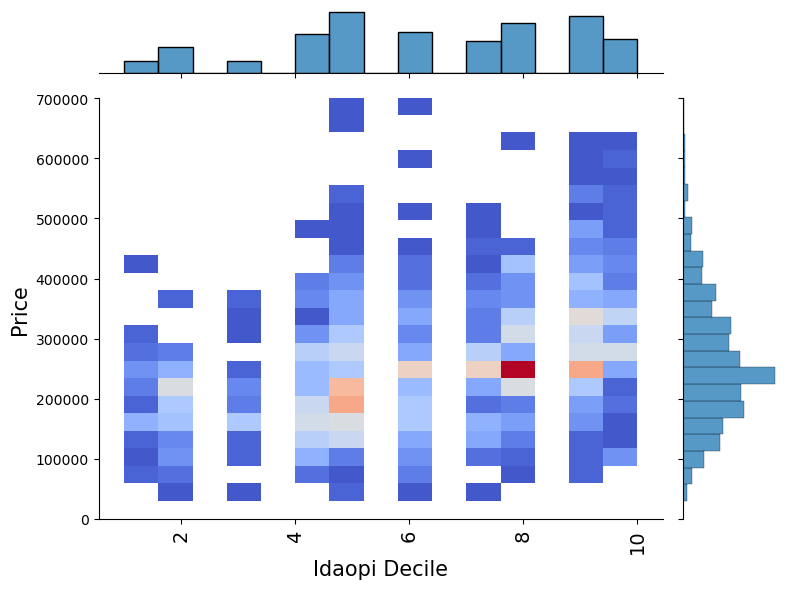

<Figure size 800x600 with 0 Axes>

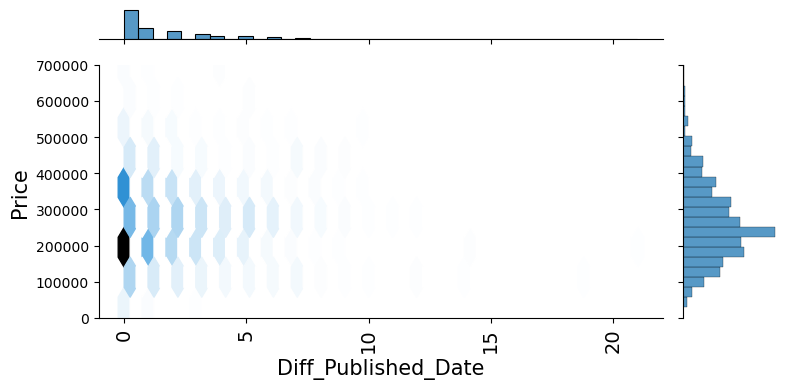

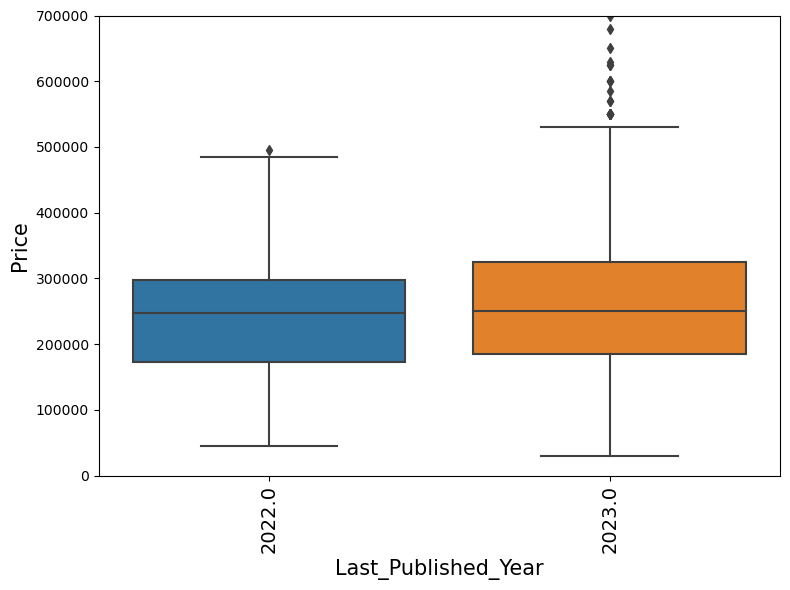

<Figure size 800x600 with 0 Axes>

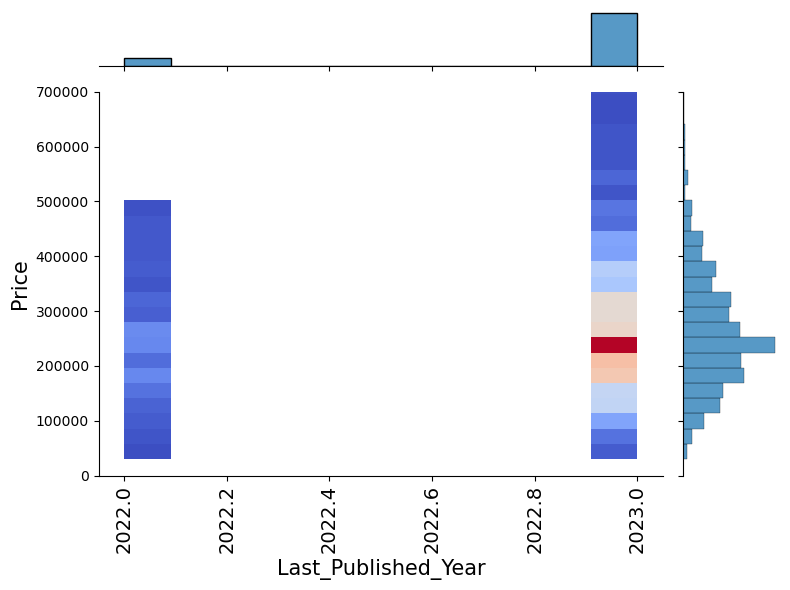

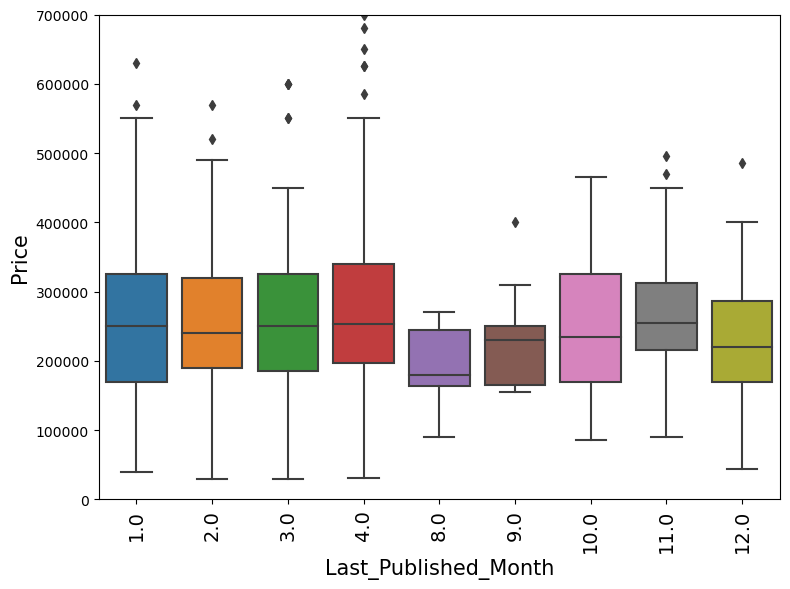

<Figure size 800x600 with 0 Axes>

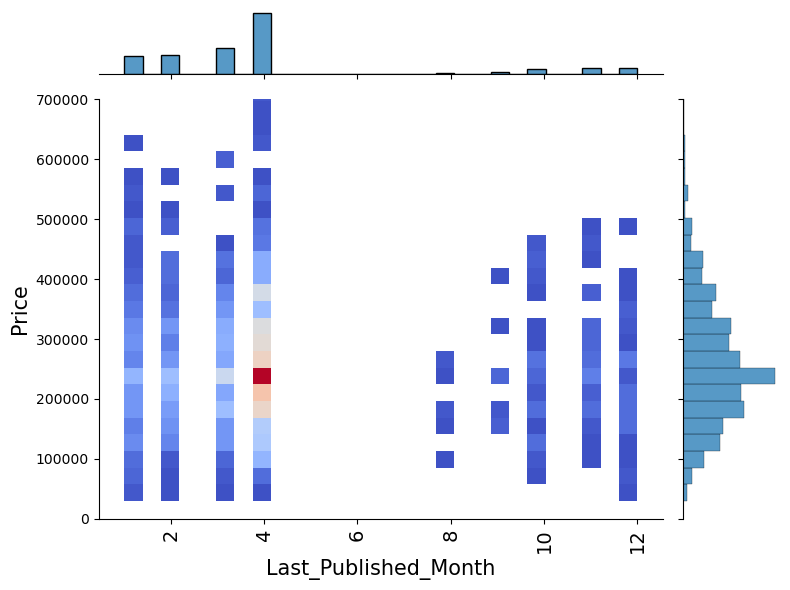

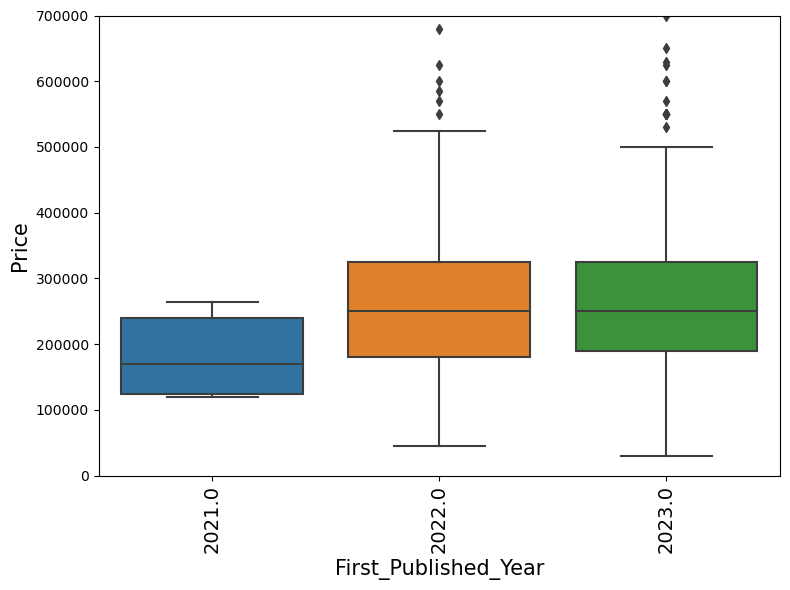

<Figure size 800x600 with 0 Axes>

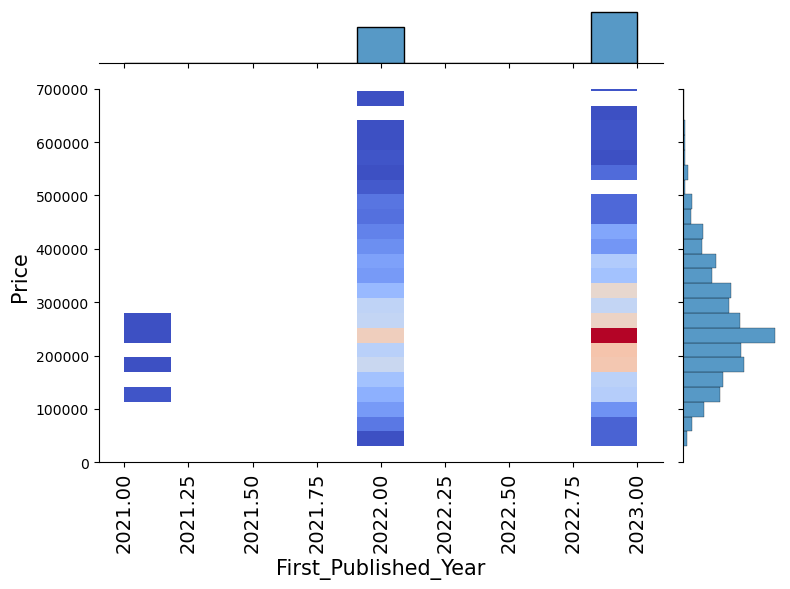

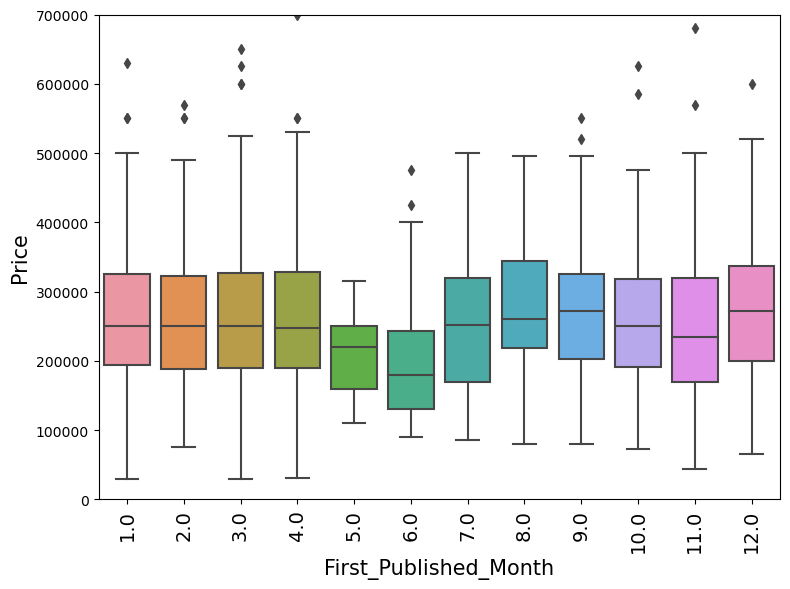

<Figure size 800x600 with 0 Axes>

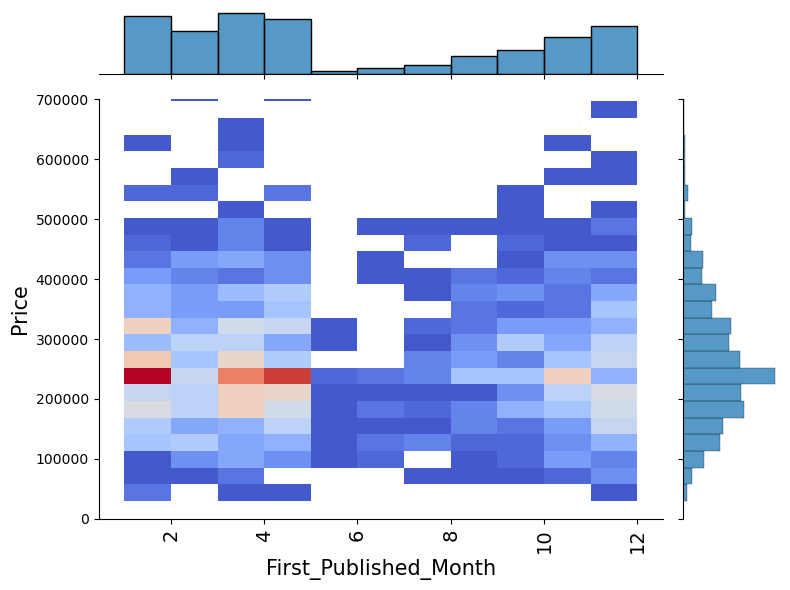

In [17]:
# Create 2D plots for numeric variables (box plots and hist plots for 
# ordered discrete variables and scatter plots for continuous variables)

for col in numeric_cols:
    
    # ignore these columns
    if col in ['latitude', 'longitude', 'price']:
        continue
    
    # continuous variables
    elif col in ['TOTAL_FLOOR_AREA_median', 'diff_published_date']:
        plot_graph(zoopla_df_train[col], zoopla_df_train['price'], kind='hex', y_lim=700000)
    
    # ordered discrete variables
    else:
        if col in ['num_bedrooms', 'num_bathrooms']:
            ylim = 1750000
        elif col in ['CURRENT_ENERGY_RATING_mode', 'POTENTIAL_ENERGY_RATING_mode']:
            ylim = 1000000
        else:
            ylim = 700000
        plot_graph(zoopla_df_train[col], zoopla_df_train['price'], kind='box', y_lim=ylim)
        plot_graph(zoopla_df_train[col], zoopla_df_train['price'], kind='hist', y_lim=ylim)


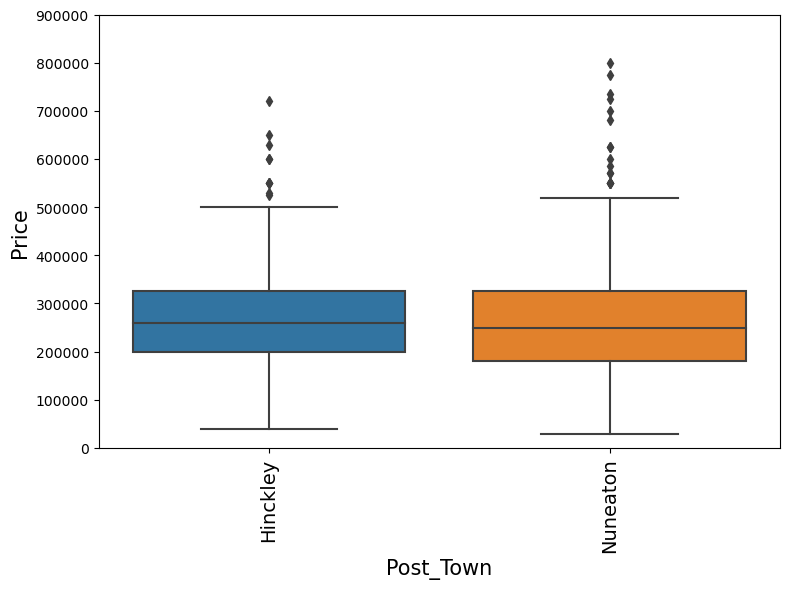

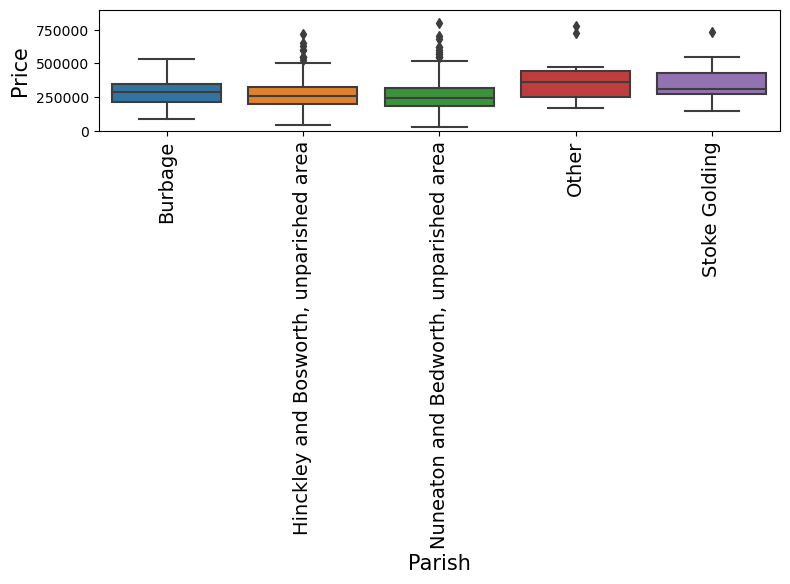

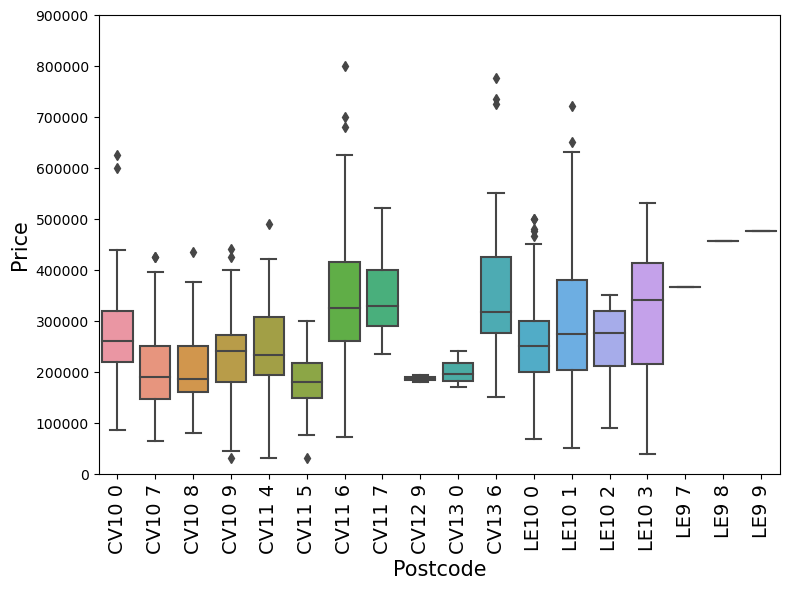

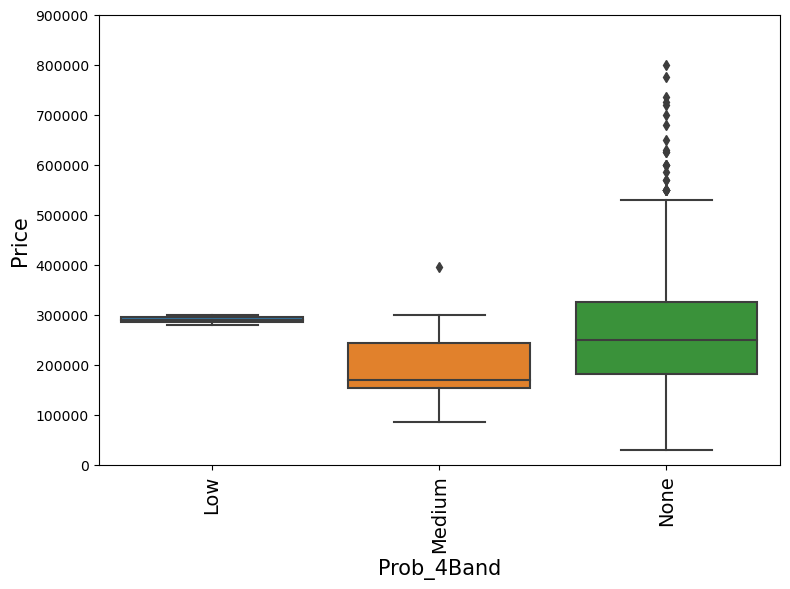

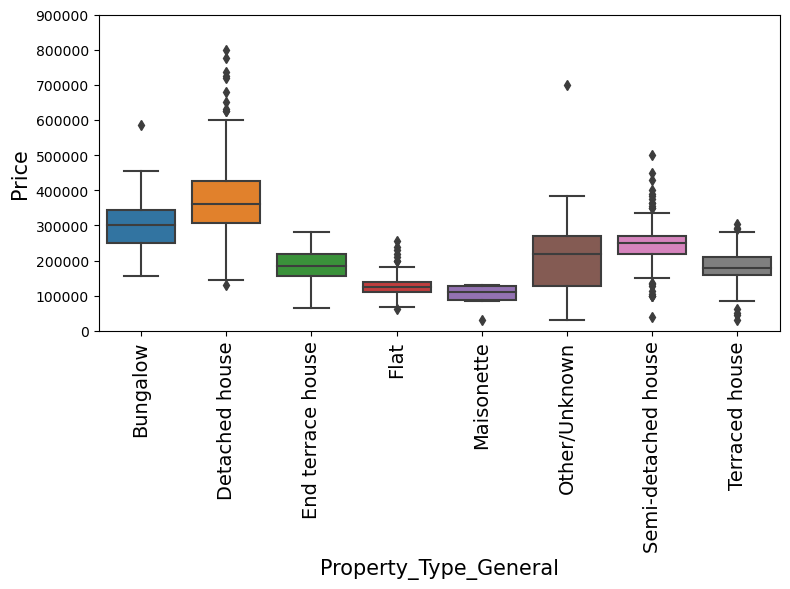

In [18]:
# 2D bar plots for categoric variables

for col in categoric_cols:
    var_order = sorted(zoopla_df_train[col].dropna().unique())
    plot_graph(zoopla_df_train[col], zoopla_df_train['price'],
               kind='box', y_lim=900000, var_order=var_order)

May be best to remove properties that are not in Nuneaton or Hinckley as there are very few.

Also, clearly longitude and latitude by themselves are too granular. Let's group these.

### See how postcode is associated with latitude and longitude

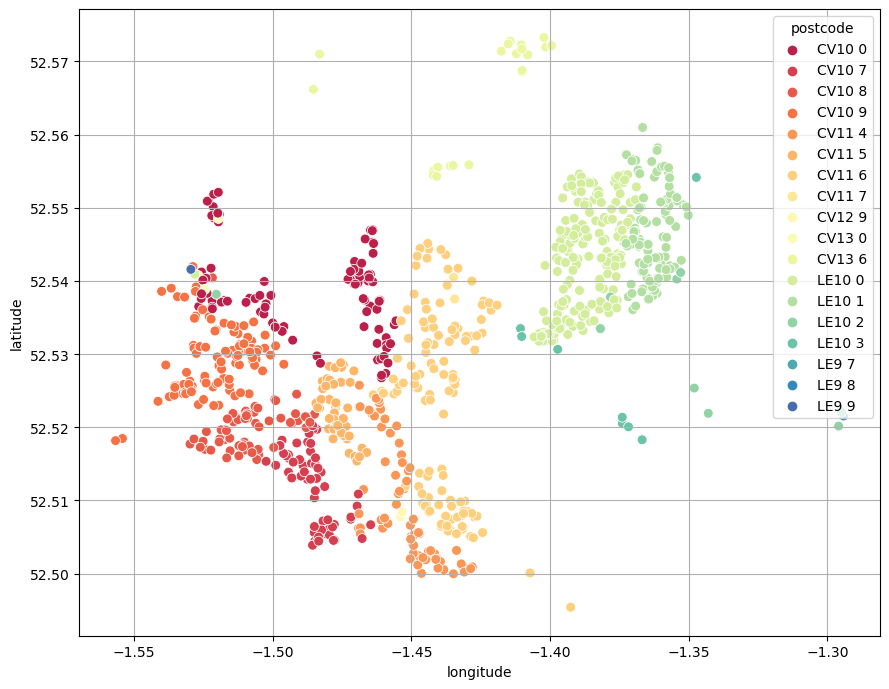

In [19]:
plt.figure(figsize=(9, 7))
sns.scatterplot(data=zoopla_df_train, x='longitude', y='latitude', hue='postcode', hue_order=sorted(zoopla_df_train['postcode'].unique()),
                palette='Spectral', s=50, legend=True)
plt.grid()
plt.tight_layout()

It's clear some postcodes overalap across areas and some postcodes have very few properties. Can we improve on this to cluster areas together?

### Use K-Means clustering to convert longitudes and latitudes into clusters

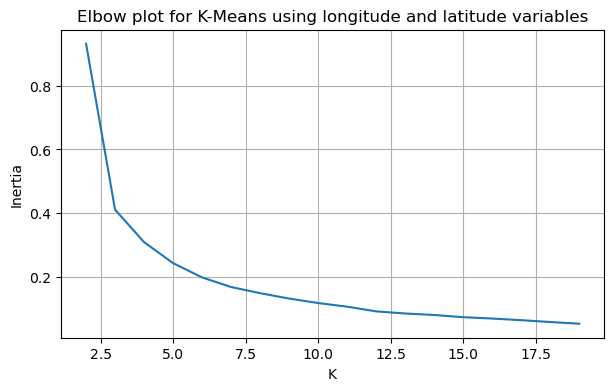

In [20]:
# Try varying numbers of k and create an inertia plot. A good k value will be at an 'elbow'
# meaning that incresing k beyond this will not have much impact

kmeans_info = {}
inertia_array = []

for k in range(2, 20):
    kmeans_k = KMeans(k, n_init=10, random_state=40)
    kmeans_k.fit(zoopla_df_train[['longitude', 'latitude']])
    kmeans_info[k] = kmeans_k
    inertia_array.append(kmeans_k.inertia_)

plt.figure(figsize=(7,4))
plt.plot(range(2,20), inertia_array)
plt.title('Elbow plot for K-Means using longitude and latitude variables')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.grid()
plt.show()

It seems that k = 8 is a good compromise. Let's look at this in more detail

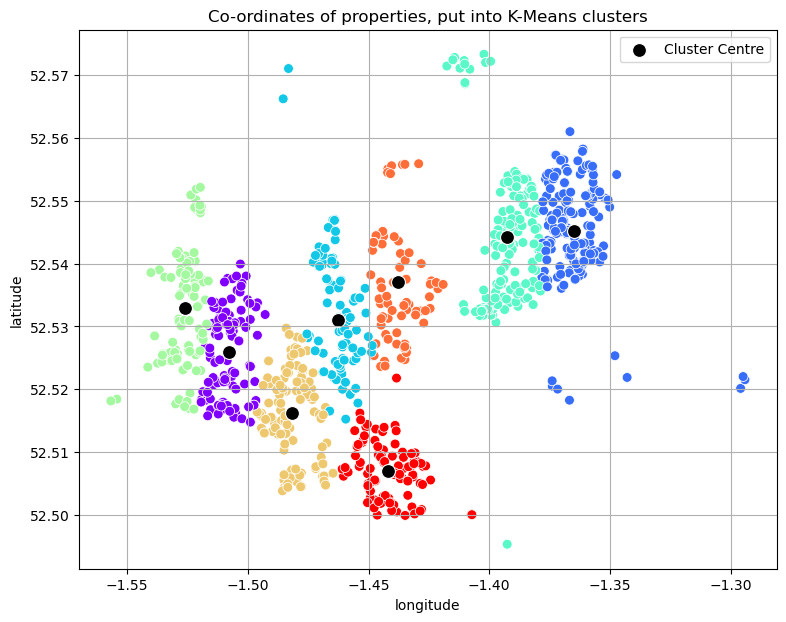

In [21]:
k_final = 8

plt.figure(figsize=(9, 7))
sns.scatterplot(data=zoopla_df_train, x='longitude', y='latitude', hue=kmeans_info[k_final].labels_, 
                palette='rainbow', s=50, legend=None)
sns.scatterplot(x=kmeans_info[k_final].cluster_centers_[:,0], y=kmeans_info[k_final].cluster_centers_[:,1], 
                color='k', s=100, label='Cluster Centre')
plt.title('Co-ordinates of properties, put into K-Means clusters')
plt.legend(fontsize=10)
plt.grid()
plt.show()

In [22]:
kmeans_final = KMeans(k_final, n_init=10, random_state=40)
kmeans_final.fit(zoopla_df_train[['longitude', 'latitude']])

KMeans(n_init=10, random_state=40)

In [23]:
# for each property, choose nearest cluster and put as new column
zoopla_df_train['coordinate_cluster'] = kmeans_final.transform(zoopla_df_train[['longitude', 'latitude']]).argmin(axis=1)

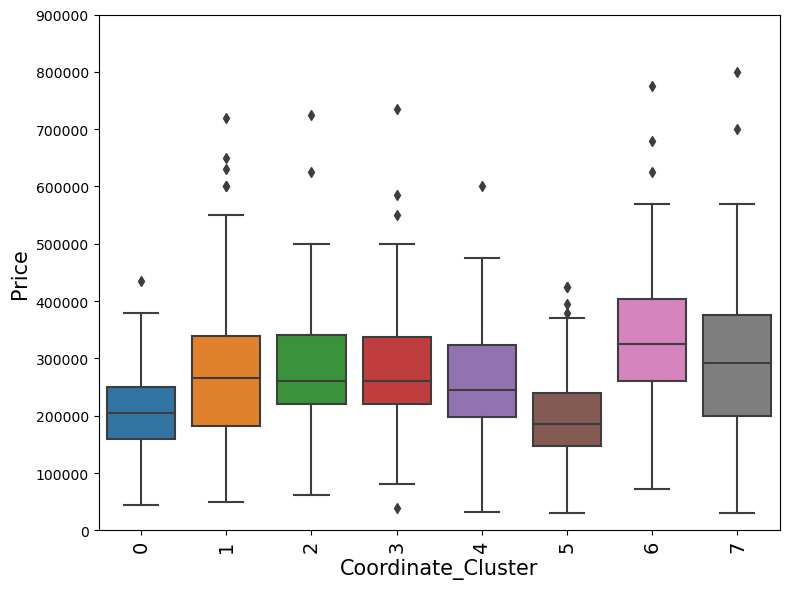

In [24]:
# see how this new column correlates with house price
plot_graph(zoopla_df_train['coordinate_cluster'], zoopla_df_train['price'], 
               kind='box', y_lim=900000, var_order=range(0, k_final))

This shows a reasonable amount of variation so we will use k = 8 for the feature engineering step.